# Attention!!!!!!!!!!
- Bodyweights are duplicated, just 113 unique values.
- After YOLO, image numbers dropped from #90881 to #46140
- After removing NaN in real body weight, image number dropped into #46092



################################################################################################
################################################################################################
################################################################################################
################################################################################################

In [66]:
import os
os.chdir("d:\\OneDrive_VT\\OneDrive - Virginia Tech\\Research\\Codes\\research\\PigBW\\Pig_BW_beta\\DL")
os.getcwd()

'd:\\OneDrive_VT\\OneDrive - Virginia Tech\\Research\\Codes\\research\\PigBW\\Pig_BW_beta\\DL'

## **Necessary Imports**

In [67]:
import numpy as np
import pandas as pd

import numpy as np
import tensorflow as tf
from tensorflow import keras
import random

In [68]:
rootdir = "H:/"
DAY = "0801"
DAY_folder = rootdir + DAY

In [69]:
bw_csv_path = "../../weight/YH_oriPen_LeeO_weights_export_20230802_062440137.xlsx"
bw_df = pd.read_excel(bw_csv_path) 

In [91]:
rowss = []
for pen in os.listdir(DAY_folder):
  print("Now is running pen number", pen)
  dep_folder = DAY_folder + "/" + pen + "/Depth_resize/"
  for bag_id in os.listdir(dep_folder):
      # print("Now is running bag id", bag_id)
      depthdir = dep_folder + bag_id + "/"
      images_per_bag = os.listdir(depthdir)
      rows = []
      try:
        weight_per_bag = bw_df["Weight (gr)"][bw_df["Top"] == bag_id + ".bag"].values[0]/1000
      except IndexError:
        continue
      
      for i, image_path in enumerate(images_per_bag):
          row = [depthdir+image_path, pen, bag_id, weight_per_bag]
          rows.append(row)
      rowss.append(rows)

Now is running pen number pen10top
Now is running pen number pen11top
Now is running pen number pen13top
Now is running pen number pen14top
Now is running pen number pen15top
Now is running pen number pen16top
Now is running pen number pen17top
Now is running pen number pen18top
Now is running pen number pen19top
Now is running pen number pen1top
Now is running pen number pen20top
Now is running pen number pen2top
Now is running pen number pen3top
Now is running pen number pen4top
Now is running pen number pen5top
Now is running pen number pen6top
Now is running pen number pen7top
Now is running pen number pen8top
Now is running pen number pen9top


In [92]:
col_vals = ['FilePath', 'Pen', "Bag_ID",'Weights']
labelled_depth = pd.concat(pd.DataFrame(rowss[i], columns=col_vals) for i in range(len(rowss)))

In [93]:
np.unique(labelled_depth["Weights"]).shape ###################astonished!

(112,)

In [94]:
print("Before removing nan, image number is %d" %len(labelled_depth))

Before removing nan, image number is 46140


In [95]:
labelled_depth = labelled_depth.dropna(axis=0)
print("After removing nan, image number is %d" %len(labelled_depth))

After removing nan, image number is 46092


In [75]:
# data = labelled_depth["Weights"]
# mean = np.nanmean(data)
# std = np.nanstd(data)
# # Calculate the zscores
# zscores = (data - mean) / std
# labelled_depth["Weights"] = zscores

In [96]:
labelled_depth

,FilePath,Pen,Bag_ID,Weights
0,H:/0801/pen10top/Depth_resize/20230801_172906/...,pen10top,20230801_172906,74.843
1,H:/0801/pen10top/Depth_resize/20230801_172906/...,pen10top,20230801_172906,74.843
2,H:/0801/pen10top/Depth_resize/20230801_172906/...,pen10top,20230801_172906,74.843
3,H:/0801/pen10top/Depth_resize/20230801_172906/...,pen10top,20230801_172906,74.843
4,H:/0801/pen10top/Depth_resize/20230801_172906/...,pen10top,20230801_172906,74.843
...,...,...,...,...
247,H:/0801/pen9top/Depth_resize/20230801_172346/_...,pen9top,20230801_172346,71.668
248,H:/0801/pen9top/Depth_resize/20230801_172346/_...,pen9top,20230801_172346,71.668
249,H:/0801/pen9top/Depth_resize/20230801_172346/_...,pen9top,20230801_172346,71.668
250,H:/0801/pen9top/Depth_resize/20230801_172346/_...,pen9top,20230801_172346,71.668


In [97]:
np.unique(labelled_depth["FilePath"]).shape #90881 for Depth #46092 for Depth1 ################attention!!!!!

(46092,)

In [98]:
np.unique(labelled_depth["Bag_ID"]).shape

(604,)

In [99]:
sum(labelled_depth["Weights"].isna())

0

(array([   44.,   106.,  1567.,  3944., 10374., 11062.,  8802.,  8085.,
         1538.,   570.]),
 array([ 37.648 ,  45.0416,  52.4352,  59.8288,  67.2224,  74.616 ,
         82.0096,  89.4032,  96.7968, 104.1904, 111.584 ]),
 <BarContainer object of 10 artists>)

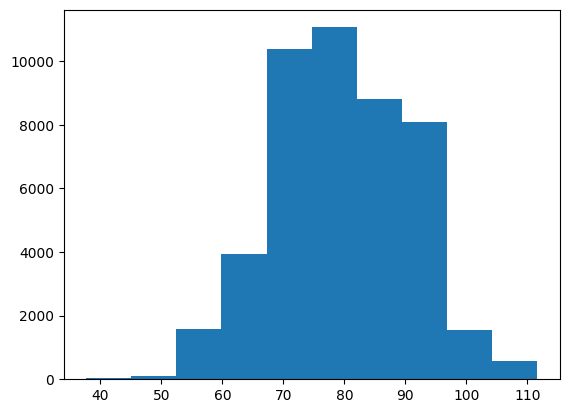

In [100]:
import matplotlib.pyplot as plt
plt.hist(labelled_depth["Weights"])

## **Create Train / Validation / Test Split, Load Images**

Prepare the images for use in the CNN now. Create the train_test_split, then create
ImageDataGenerator objects to scale the pixel values for each depth image, and subsequently create
a validation set out of the training set.

In [101]:
import random
train_bag_id = random.sample(list(np.unique(labelled_depth["Bag_ID"])), int(604*0.8))

train_df = labelled_depth[labelled_depth["Bag_ID"].isin(train_bag_id)]
test_df = labelled_depth[-labelled_depth["Bag_ID"].isin(train_bag_id)]

In [102]:
print("Training set size is %d" %train_df.shape[0])
print("Test set size is %d" %test_df.shape[0])
print("Training set bag id size is %d" %np.unique(train_df["Bag_ID"]).shape[0])
print("Test set bag id size is %d" %np.unique(test_df["Bag_ID"]).shape[0])

Training set size is 37263
Test set size is 8829
Training set bag id size is 483
Test set bag id size is 121


In [103]:
import tensorflow as tf

In [104]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale =1./255,
    validation_split = 0.2
)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255
)

In [105]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='FilePath',
    y_col='Weights',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=100,
    shuffle=True,
    seed=42,
    subset='training',
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='FilePath',
    y_col='Weights',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=100,
    shuffle=True,
    seed=42,
    subset='validation',
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='FilePath',
    y_col='Weights',
    target_size=(224,224),
    color_mode='rgb',
    class_mode='raw',
    batch_size=100,
    shuffle=False,
)

Found 29811 validated image filenames.
Found 7452 validated image filenames.
Found 8829 validated image filenames.


## **CNN Design**

The code below outlines the architecture of the CNN we use.

The first Conv2D layer uses a large inital kernal size because the only feature in the input image is the cow itself, which covers a significant amount of area. Being able to absorb this information spread out across fewer filters will allow us to better capture the relationship between the area it is occupying and its resulting weight prediction - in theory.

The remaining layers function have no special modifications.

In [106]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow is using a GPU")

TensorFlow is using a GPU


In [107]:
inputs = tf.keras.Input(shape=(224,224,3))
x = tf.keras.layers.Conv2D(filters=8, kernel_size=(30,30), activation='relu')(inputs)
x = tf.keras.layers.AveragePooling2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = tf.keras.layers.AveragePooling2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

## **CNN Training**

For training we use the Adam Optimizer and MSE loss.

We also perform early stopping checks in the event validation error rises. If the early stopping criteria is not hit, then we will perform 100 epochs of training.

In [88]:
# optimizer = tfa.optimizers.AdamW(
#         learning_rate=learning_rate, weight_decay=weight_decay
#     )

In [108]:
cnn = tf.keras.Model(inputs = inputs, outputs = outputs)
cnn.summary()


Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 195, 195, 8)       21608     
                                                                 
 average_pooling2d_6 (Averag  (None, 97, 97, 8)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 95, 95, 32)        2336      
                                                                 
 average_pooling2d_7 (Averag  (None, 47, 47, 32)       0         
 ePooling2D)                                                     
                                                                 
 global_average_pooling2d_3   (None, 32)               0   

In [109]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
keras.utils.set_random_seed(seed)

cnn.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=1e-2),
    loss=keras.losses.MeanSquaredError(),
    metrics=[keras.metrics.MeanSquaredError()],
    # batch_size=32
)

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
epochs = 100

history=cnn.fit(train_images, 
        epochs=epochs, 
        validation_data=val_images,
        callbacks = [es])

Epoch 1/100
299/299 [==============================] - 50s 166ms/step - loss: 198.7544 - mean_squared_error: 198.7544 - val_loss: 94.7787 - val_mean_squared_error: 94.7787
Epoch 2/100
299/299 [==============================] - 53s 176ms/step - loss: 134.7902 - mean_squared_error: 134.7902 - val_loss: 90.9077 - val_mean_squared_error: 90.9077
Epoch 3/100
299/299 [==============================] - 49s 163ms/step - loss: 135.0295 - mean_squared_error: 135.0295 - val_loss: 92.8561 - val_mean_squared_error: 92.8561
Epoch 4/100
299/299 [==============================] - 44s 148ms/step - loss: 128.5888 - mean_squared_error: 128.5888 - val_loss: 96.9439 - val_mean_squared_error: 96.9439
Epoch 5/100
299/299 [==============================] - 45s 151ms/step - loss: 128.0143 - mean_squared_error: 128.0143 - val_loss: 100.5317 - val_mean_squared_error: 100.5317
Epoch 6/100
299/299 [==============================] - 45s 150ms/step - loss: 131.5731 - mean_squared_error: 131.5731 - val_loss: 99.0494 

In [ ]:
# cnn = tf.keras.Model(inputs = inputs, outputs = outputs)
# cnn.summary()
# cnn.compile(
#     optimizer='adam',
#     loss='mse'
# )

In [ ]:
# history = cnn.fit(
#     train_images,
#     validation_data=val_images,
#     epochs=100,
#     callbacks=[
#         tf.keras.callbacks.EarlyStopping(
#             monitor='val_loss',
#             patience=50,
#             restore_best_weights=True
#         )
#     ]
# )

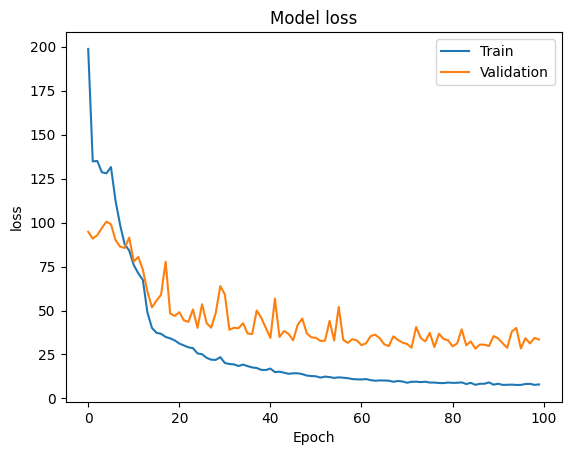

In [110]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## **Making Predictions on Test Set**

Here we run the test images through the trained CNN, and get predictions on the weights.

We also want to perfrom some amount of backend CV. To do so, select a single cow from each day and grab its associated measured weight, and perform a prediction.

These selected values will also be scored in the next block, at the same time as the entire testing set.

In [ ]:
# cnn.load_weights("./python/cnn/cnn_weights_forcast_20_8.h5")

In [111]:
predicted_weights = np.squeeze(cnn.predict(test_images))
true_weights = test_images.labels

89/89 [==============================] - 16s 185ms/step


## **Model Evaluation / Metric Determination**

To demonstrate the total quality of the ending model we find the RMSE and R^2 scores.

The RMSE demonstrates exactly how far from some regression line our data points are. Smaller is better.

The R^2 score demonstrates how much variation in our prediction is explained by the input images. Typically, larger means better. In our case this is the degree to which our predictions' variance can be explained by the contents of the image itself - or essentially how much our model is actually using those pixels to generate a conclusion.

In [112]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [113]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
print('METRICS ON ENTIRE DATASET:')
print('--------------------------')
# rmse = np.sqrt(cnn.evaluate(test_images, verbose=0))
rmse = mean_squared_error(true_weights, predicted_weights)**0.5
print("Test RMSE:\t{:.5f}".format(rmse))
r2 = r2_score(true_weights,predicted_weights)
print("Test R^2 Score:\t{:.5f}".format(r2))
MAPE = mape(true_weights, predicted_weights)
print("Test MAPE:\t{:.5f}%".format(MAPE))
print('--------------------------')

METRICS ON ENTIRE DATASET:
--------------------------
Test RMSE:	5.00520
Test R^2 Score:	0.77779
Test MAPE:	5.09345%
--------------------------
